In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import pandas_datareader as web

from datetime import datetime

from __future__ import division

In [2]:
tech_list=['AAPL','MSFT','GOOG','AMZN']

end=datetime.now()
start=datetime(end.year-1,end.month,end.day)

In [3]:
for stock in tech_list:
    globals()[stock]=web.get_data_yahoo(stock,start,end)

In [4]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,160.598924,156.628486,158.510797,158.692909,8.925313e+07,158.275314
std,12.358520,12.332092,12.429375,12.337932,2.666012e+07,12.261974
min,132.389999,129.039993,130.070007,130.059998,4.100000e+07,129.879593
25%,150.289993,147.649994,148.910004,149.250000,7.018920e+07,148.568634
50%,162.139999,156.720001,159.589996,159.300003,8.444270e+07,158.910004
75%,171.065002,167.300003,169.385002,169.060005,1.017418e+08,168.770233
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.259918


In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-10-04 to 2022-09-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       251 non-null    float64
 1   Low        251 non-null    float64
 2   Open       251 non-null    float64
 3   Close      251 non-null    float64
 4   Volume     251 non-null    float64
 5   Adj Close  251 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


<AxesSubplot:xlabel='Date'>

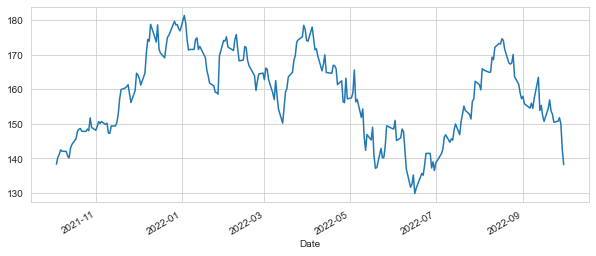

In [6]:
AAPL['Adj Close'].plot(figsize=(10,4))

In [7]:
ma_day=[10,20,50]

for ma in ma_day:
    column_name='MA for %s days' %(str(ma))
    
    AAPL[column_name]=pd.close.rolling(AAPL['Adj Close'],ma)

AttributeError: module 'pandas' has no attribute 'close'

In [8]:
AAPL['Daily Return']= AAPL['Adj Close'].pct_change()


<AxesSubplot:xlabel='Date'>

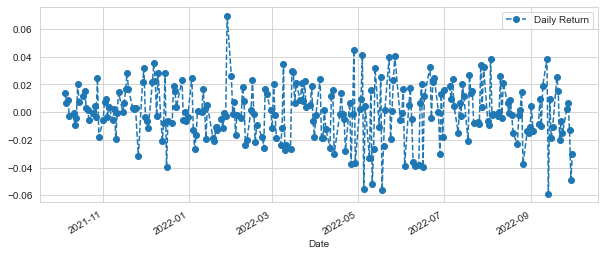

In [9]:
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

C:\Users\Prerana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

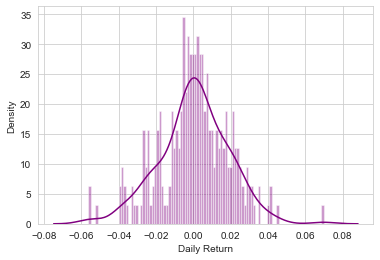

In [39]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [40]:
closing_df=web.get_data_yahoo(tech_list,start,end)['Adj Close']

In [41]:
closing_df.head()

Symbols,AAPL,MSFT,GOOG,AMZN
Date,,,,
2021-06-23,132.940491,263.121490,2529.229980,175.190994
2021-06-24,132.652130,264.529968,2545.639893,172.453995
2021-06-25,132.353836,262.873535,2539.899902,170.072998
2021-06-28,134.014359,266.543518,2536.389893,172.194504
2021-06-29,135.555527,269.201813,2520.370117,172.406998


In [42]:
tech_rect=closing_df.pct_change()

In [43]:
tech_rect

Symbols,AAPL,MSFT,GOOG,AMZN
Date,,,,
2021-06-23,NaN,NaN,NaN,NaN
2021-06-24,-0.002169,0.005353,0.006488,-0.015623
2021-06-25,-0.002249,-0.006262,-0.002255,-0.013807
2021-06-28,0.012546,0.013961,-0.001382,0.012474
2021-06-29,0.011500,0.009973,-0.006316,0.001234
...,...,...,...,...
2022-06-16,-0.039651,-0.026970,-0.034011,-0.037243
2022-06-17,0.011533,0.010940,0.011530,0.024696
2022-06-21,0.032761,0.024591,0.038469,0.023159


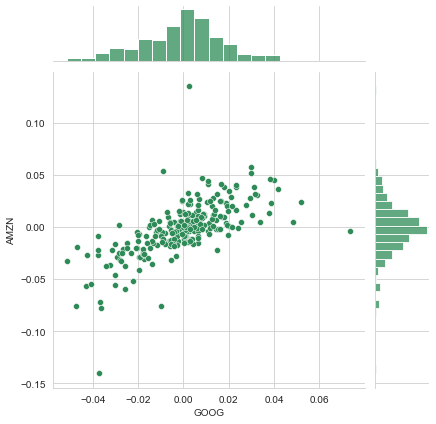

In [47]:
sns.jointplot('GOOG','AMZN',tech_rect,kind='scatter',color='seagreen',legend=True)

In [46]:
import warnings
warnings.filterwarnings('ignore')

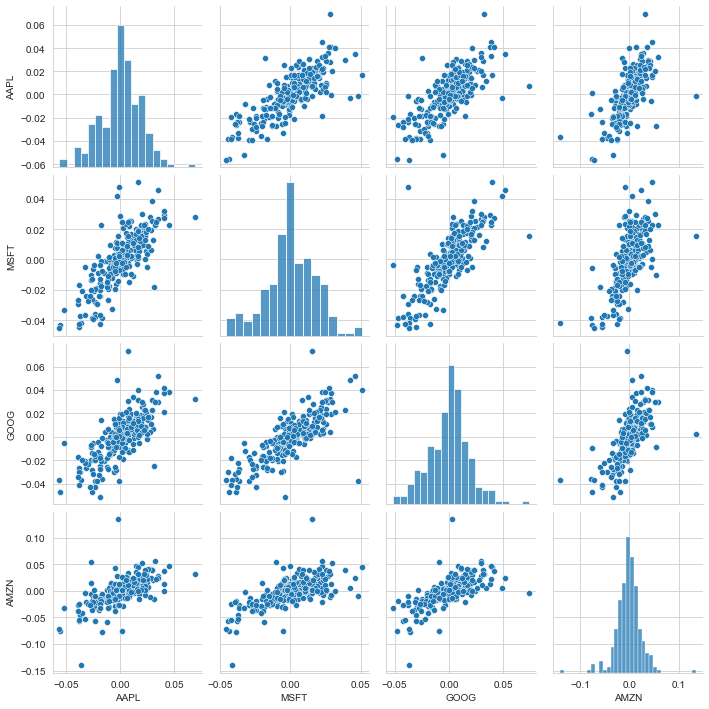

In [48]:
sns.pairplot(tech_rect.dropna())

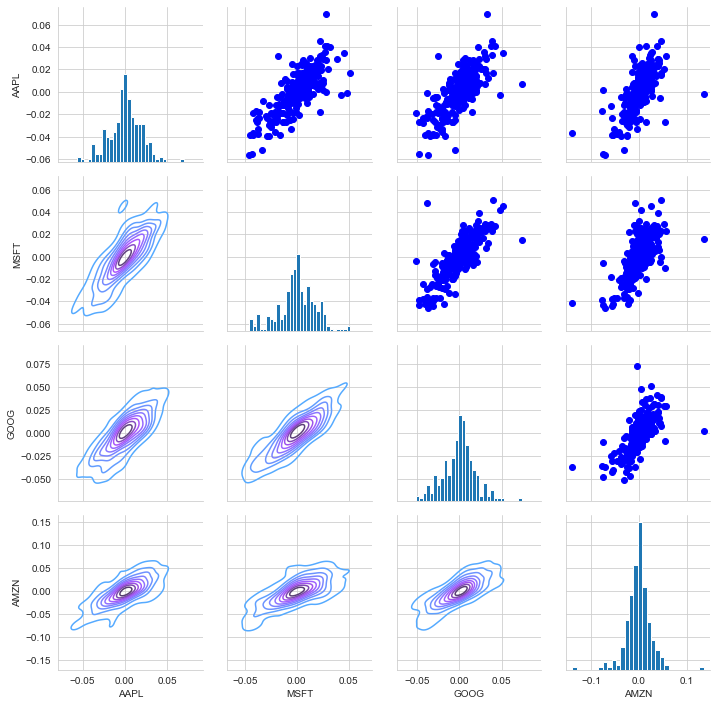

In [51]:
returns_fig=sns.PairGrid(tech_rect.dropna())

returns_fig.map_upper(plt.scatter,color='blue')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

In [10]:
sns.corrplot(tech_rect.dropna())

AttributeError: module 'seaborn' has no attribute 'corrplot'